In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sb 
from pandas import Series,DataFrame
from numpy.random import randn 
from matplotlib import rcParams 
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import SparkSession

get_ipython().run_line_magic('matplotlib', 'inline')
rcParams['figure.figsize']=10,10
sb.set_style('whitegrid')
warnings.filterwarnings("ignore")

# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Set random seed
np.random.seed(0)

add = 'C:\data_train.csv'
train = pd.read_csv(add)

add = 'C:\data_test.csv'
test = pd.read_csv(add)

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [7]:
label = train['label']
label.head()

0     False.
1     False.
2     False.
3     False.
4     False.
Name: label, dtype: object

In [14]:
train['label'] = pd.factorize(train['label'])[0]

In [15]:
train.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
label = train['label']
label.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [17]:
len(label)

3333

In [18]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [19]:
train = train.drop(['st'],axis=1)
train = train.drop(['phnum'],axis=1)
train = train.drop(['label'],axis=1)
train['intplan'] = pd.factorize(train['intplan'])[0]
train['voice'] = pd.factorize(train['voice'])[0]
train.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [21]:
model = clf.fit(train, label)

In [22]:
from sklearn.metrics import accuracy_score
from sklearn import tree

In [23]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(train,label)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [24]:
test = test.drop(['st'],axis=1)
test = test.drop(['phnum'],axis=1)
test = test.drop(['label'],axis=1)
test['intplan'] = pd.factorize(test['intplan'])[0]
test['voice'] = pd.factorize(test['voice'])[0]
test.head()


,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2


In [25]:
y_pred = clf_gini.predict(test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
label.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [27]:
add = 'C:\data_test.csv'
test = pd.read_csv(add)

test['label'] = pd.factorize(test['label'])[0]

test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [28]:
pd.crosstab(test['label'], y_pred, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,1436,7
1,144,80


In [29]:
len(label)

3333

In [30]:
len(y_pred)

1667

In [31]:
tn = 1435
tp = 80
fp = 7
fn = 144

In [32]:
acc = ((tp+tn)/1667)*100
print('Accuracy: ' + str(acc))

recall = tp/(tp+fn)
print('Recall value is: ' + str(recall))

prec = tp/(tp+fp)
print('precision is: ' + str(prec))

f1 = 2*((prec*recall)/(prec+recall))
print('F1 score is: ' + str(f1))

Accuracy: 90.88182363527294
Recall value is: 0.35714285714285715
precision is: 0.9195402298850575
F1 score is: 0.5144694533762058


In [33]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(train,label)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [34]:
test = test.drop(['st'],axis=1)
test = test.drop(['phnum'],axis=1)
test = test.drop(['label'],axis=1)
test['intplan'] = pd.factorize(test['intplan'])[0]
test['voice'] = pd.factorize(test['voice'])[0]
test.head()

,acclen,arcode,intplan,voice,nummailmes,tdmin,tdcal,tdchar,temin,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc
0,101,510,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3
1,137,510,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0
2,103,408,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1
3,99,415,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1
4,108,415,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2


In [35]:
y_pred2 = clf_entropy.predict(test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
add = 'C:\data_test.csv'
test = pd.read_csv(add)

test['label'] = pd.factorize(test['label'])[0]

test.head()

,st,acclen,arcode,phnum,intplan,voice,nummailmes,tdmin,tdcal,tdchar,...,tecal,tecahr,tnmin,tncal,tnchar,timin,tical,tichar,ncsc,label
0,HI,101,510,354-8815,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
1,MT,137,510,381-7211,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
2,OH,103,408,411-9481,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
3,NM,99,415,418-9100,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
4,SC,108,415,413-3643,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [37]:
pd.crosstab(test['label'], y_pred2, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1
Actual Species,,
0,1436,7
1,144,80


In [38]:
label2 = test['label']

In [40]:
print ("Accuracy is " +  str(accuracy_score(label2,y_pred)*100) )

Accuracy is 90.94181163767246


In [41]:
print ("Accuracy is " +  str(accuracy_score(label2,y_pred2)*100) )

Accuracy is 90.94181163767246


<BarContainer object of 4 artists>

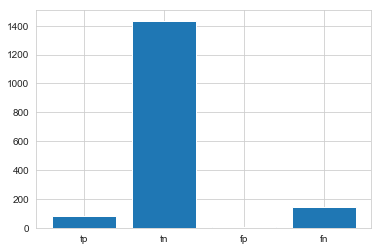

In [54]:
x = ['tp', 'tn', 'fp', 'fn']
y = [tp,tn,fp,fn]
plt.bar(x,y)

([<matplotlib.patches.Wedge at 0x17a8f987fd0>,
 [Text(1.0875069455378104, 0.16531377258722965, ''),
  Text(-1.0901557932147072, 0.14683441871854466, ''),
  Text(0.9341451419779653, -0.5808380615274513, ''),
  Text(1.059694190639576, -0.29503935724701874, '')])

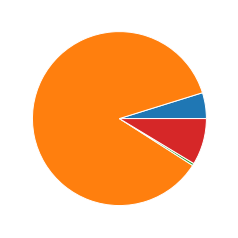

In [56]:
y = [tp,tn,fp,fn]
plt.pie(y)